In [22]:
import bioframe
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Importing ChIP-seq Peaks for CTCF-AID cells after 2 days of auxin and wildtype after 2 days of auxin treatment

In [2]:
sdir = '/scratch/pokorny/Elphege_2017/'
CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1 = sdir+'GSM2609186_CTCF_ChIP-seq_CTCF-AID_auxin2days_rep1_ENC125_Peaks.bed'
CTCF_ChIP_exo_WT_untagged_auxin2days_rep1 = sdir+'GSM2609196_CTCF_ChIP-exo_WT-untagged_auxin2days_rep1_ENC2_Peaks.bed'

# Read the files into tables
ctcf_auxin2days = bioframe.read_table(CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1, schema='bed')
wt_auxin2days = bioframe.read_table(CTCF_ChIP_exo_WT_untagged_auxin2days_rep1, schema='bed')

In [3]:
ctcf_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,4322655,4322855,NaN,NaN,NaN
1,chr1,4336363,4336563,NaN,NaN,NaN
2,chr1,4758529,4758729,NaN,NaN,NaN
3,chr1,4760048,4760248,NaN,NaN,NaN
4,chr1,6408056,6408256,NaN,NaN,NaN


In [4]:
wt_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,3002702,3002902,NaN,NaN,NaN
1,chr1,3053590,3053790,NaN,NaN,NaN
2,chr1,3107612,3107812,NaN,NaN,NaN
3,chr1,3278540,3278740,NaN,NaN,NaN
4,chr1,3315378,3315578,NaN,NaN,NaN


## Creating summary of the ChIP-seq Peak files

Counting number of chromosomes represented, how many peaks in each chromosome, genomic intervals between each
Basically, finding here is just that we lost a lot of CTCF-bound to the genome after auxin-induced degradation of CTCF (makes sense). 
- Could be interesting to use the overlapping intervals (i.e. sites where CTCF still hung on after degradation) and see if these correlate to anything. I predict that they will correlate to strong motifs. The subset of genes regulated by these CTCF binding regions should have similar expression levels in either WT or dCTCF

- The strength of these peaks (derived by number sequencing reads) may also be an interesting 

In [5]:
# counting unique values for chromosome column
print("Number of chromosomes represented by data: " + str(pd.unique(ctcf_auxin2days['chrom']).size))

print("Chromosomes: ")
print(*pd.unique(ctcf_auxin2days['chrom']))

Number of chromosomes represented by data: 20
Chromosomes: 
chr1 chr2 chr3 chr4 chr5 chr6 chr7 chr8 chr9 chrX chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19


<function matplotlib.pyplot.show(close=None, block=None)>

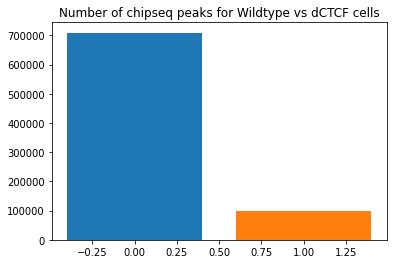

In [6]:
# Compare number of peaks
num_ctcf_auxin_chipseq_peaks = ctcf_auxin2days.size
num_wt_chipseq_peaks = wt_auxin2days.size

plt.bar(0, num_wt_chipseq_peaks, width=0.8)
plt.bar(1, num_ctcf_auxin_chipseq_peaks, width=0.8)
plt.title('Number of chipseq peaks for Wildtype vs dCTCF cells')

plt.show

In [6]:
overlap = bioframe.overlap(ctcf_auxin2days,wt_auxin2days, suffixes=('_ctcf','_wt'))

In [7]:
wt_exclusive = bioframe.subtract(wt_auxin2days, ctcf_auxin2days)

ctcf_exclusive = bioframe.subtract(ctcf_auxin2days, wt_auxin2days)

Number of regions bound by CTCF: 19876
Number of regions in WT only: 117797
Number of regions in -CTCF only: 13977


<function matplotlib.pyplot.show(close=None, block=None)>

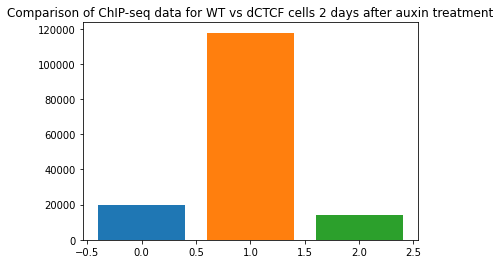

In [8]:
print('Number of regions bound by CTCF: {}'.format(len(overlap)))
print('Number of regions in WT only: {}'.format(len(wt_exclusive)))
print('Number of regions in -CTCF only: {}'.format(len(ctcf_exclusive)))

plt.bar(0, len(overlap), width=0.8)
plt.bar(1, len(wt_exclusive), width=0.8)
plt.bar(2, len(ctcf_exclusive), width=0.8)
plt.title('Comparison of ChIP-seq data for WT vs dCTCF cells 2 days after auxin treatment')

plt.show

# Importing RNA-seq data for CTCF-AID cells prior to auxin treatments and after 2 days of auxin treatment

## Download Supplementary Table3 RNA-seq FPKM values, Related to figure 6 
FPKM = 'Fragments Per Kilobase of transcript per Million' mapped reads. In RNA-Seq, the relative expression of a transcript is proportional to the number of cDNA fragments that originate from it.

Can use this data as a measurement of transcription levels for a gene.
Note: tried to import one of the bigwig files directly and crashed the jupyter kernel, so might have to process that richer data in the shell env.

In [10]:
#Download Supplementary Table3 RNA-seq FPKM values, Related to figure 6 
RNA_seq_FPKM = pd.read_excel('/scratch/pokorny/Elphege_2017/sup_data/NIHMS873912-supplement-10.xlsx', skiprows=6, usecols="A:G, O:Q")

In [18]:
RNA_seq_FPKM = RNA_seq_FPKM.rename(columns={'untreated': 'CTCF-AID_untreated', '1day': 'CTCF-AID_1day', '2days': 'CTCF-AID_2days', '4days': 'CTCF-AID_4days',
                                '2days_washoff_2days' : 'CTCF-AID_washoff', 'untreated.1' : 'WT_untreated', '2days.3' : 'WT_2days', '4days.3' : 'WT_4days'})

RNA_seq_FPKM[0:5]

,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_1day,CTCF-AID_2days,CTCF-AID_4days,CTCF-AID_washoff,WT_untreated,WT_2days,WT_4days
0,0610005C13Rik,chr7:52823164-52845080,0.784511,0.804255,1.040841,2.176798,1.209881,0.531110,0.539697,0.414068
1,0610007P14Rik,chr12:87156404-87165495,71.716133,74.856200,63.412767,59.250033,67.995733,57.020867,49.716167,57.023633
2,0610009B22Rik,chr11:51498886-51502136,69.529333,76.436433,61.336067,38.937500,58.353700,58.497000,46.990267,58.072767
3,0610009L18Rik,chr11:120209991-120212504,0.944842,1.154941,0.905838,1.097459,0.889548,1.180704,1.977405,0.825640
4,0610009O20Rik,chr18:38398058-38422283,17.565900,20.652933,20.476800,20.633733,18.857300,18.864133,18.413433,18.779333


In [16]:
# Split the string-format of locus into a list of values that follow bedframe format: [chrom, start, end]
def parseLocus(locus):
    
    chrom = locus.split(':')[0]
    bedframe_indices = locus.split(':')[1].split('-')
    bedframe_indices.insert(0, chrom)
    return bedframe_indices

# # little test
# sample_locus = 'chr2:174952492-175261278'
# bedframe_list = parseLocus(sample_locus)
# print(bedframe_list)

In [29]:
# Extract locus column to save as a bedframe
## note: the indices of this should be the same as RNA_seq_FPKM, so after mapping should be able to extract the FPKM values from there (hopefully)
RNA_seq_bf = RNA_seq_FPKM.apply(lambda row: parseLocus(row['locus']), axis=1, result_type='expand')
RNA_seq_bf.columns = ['chrom', 'start', 'end']
RNA_seq_bf[0:5]


,chrom,start,end
0,chr7,52823164,52845080
1,chr12,87156404,87165495
2,chr11,51498886,51502136
3,chr11,120209991,120212504
4,chr18,38398058,38422283


In [40]:
# Group FPKM data according to change in expression from untreated to 2days of auxin treatment
twoDay_RNAseq_change = RNA_seq_FPKM.filter(['tracking_id', 'locus', 'CTCF-AID_untreated', 'CTCF-AID_2days'], axis=1)
twoDay_RNAseq_change['delta'] = twoDay_RNAseq_change.apply(lambda row: row['CTCF-AID_2days'] / row['CTCF-AID_untreated'], axis=1)

twoDay_RNAseq_change[0:5]

,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_2days,delta
0,0610005C13Rik,chr7:52823164-52845080,0.784511,1.040841,1.326738
1,0610007P14Rik,chr12:87156404-87165495,71.716133,63.412767,0.884219
2,0610009B22Rik,chr11:51498886-51502136,69.529333,61.336067,0.882161
3,0610009L18Rik,chr11:120209991-120212504,0.944842,0.905838,0.958719
4,0610009O20Rik,chr18:38398058-38422283,17.565900,20.476800,1.165713


# Visualizing relationship between differentially expressed genes and CTCF binding to the Transcription Start Site

In [41]:
# Importing TSS annotations
tssfile = '/scratch/pokorny/genomic_annotations/refTSS_v3.3/refTSS_v3.3_human_coordinate.hg38.bed'

tss_intervals = pd.read_table(tssfile, header=None, usecols=[0,1,2], names=['chrom', 'start', 'end'])

## 

In [ ]:
# mapping to RNA_seq data to TSS


In [55]:
import numpy as np

## Getting closest TSS to regions bound by CTCF

Note: this is just one of the time-points. Fig. 6(d) uses ChIp-exo data, not ChIp-seq data (so should really do this analysis with those to make the same output as figure 6.

Another reason they chose ChiP-exo: https://www.nature.com/articles/s41467-018-05265-7 
Although ChIP-seq is widely adopted in academic research, it has inherently high noise. In contrast, ChIP-exo has relatively low noise and achieves near-base pair resolution. Consequently, and unlike other genomic assays, ChIP-exo provides structural information on genome-wide binding proteins.
- Not sure why they did ChiP-seq in the first place?

In [32]:
# Getting genomic distances for CTCF-bound genes in either CTCF or WT (after 2 days of auxin treatment)
closest_ctcf = bioframe.closest(ctcf_auxin2days, tss_intervals, suffixes=('_ctcf','_tss'))
closest_wt = bioframe.closest(wt_auxin2days, tss_intervals, suffixes=('_wt', '_tss'))

closest_ctcf[0:4]

,chrom_ctcf,start_ctcf,end_ctcf,name_ctcf,score_ctcf,strand_ctcf,chrom_tss,start_tss,end_tss,distance
0,chr1,4322655,4322855,NaN,NaN,NaN,chr1,4365720,4365723,42865
1,chr1,4336363,4336563,NaN,NaN,NaN,chr1,4365720,4365723,29157
2,chr1,4758529,4758729,NaN,NaN,NaN,chr1,4767093,4767108,8364
3,chr1,4760048,4760248,NaN,NaN,NaN,chr1,4767093,4767108,6845


Text(0, 0.5, 'Number of transcripts detected')

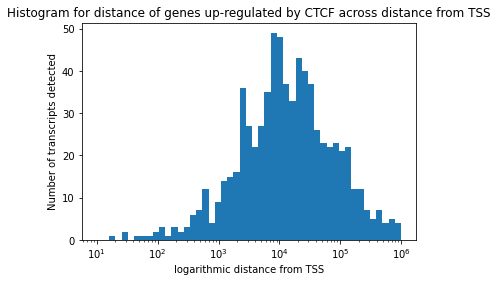

In [71]:
chr1_ctcf_data = closest_ctcf[closest_ctcf['chrom_ctcf']=='chr1']['distance']

MIN, MAX = 10.0, 1000000.0

plt.figure()
plt.hist(chr1_ctcf_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes up-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

Text(0, 0.5, 'Number of transcripts detected')

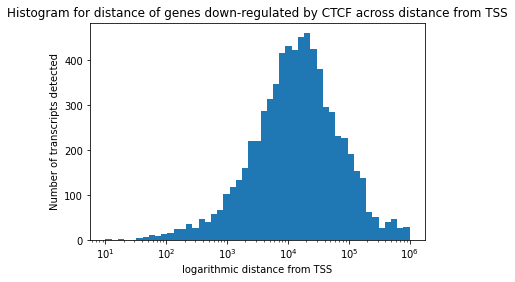

In [72]:
chr1_wt_data = closest_wt[closest_wt['chrom_wt']=='chr1']['distance']

plt.figure()
plt.hist(chr1_wt_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes down-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

# Todo/ Up Next

* Get -cohesin RNAseq data and compare to -CTCF
* download Nora2017 in supTable 4 and extract the positions from the excel file, look at the distances between those and CTCF.
* Replicate Nora2017 Fig. 6c-d: 
** 1. Fig 6c --> need to download annotation for CTCF binding sites on top to recreate this (look into Smc1a HiChIP loop anchors "Gene misregulated upon CTCF depletion are more often found close to Smc1a HiChIP loop anchors than expected by chance. See STAR Methods for statistical details")
** 2. Fig. 6d --> need to download enhancer annotation

# For fun, attempted mapping shared vs exclusive genes per TAD regions (failed attempt)

In [ ]:
# downloaded regions from Dixon 2012, GSE35156
## note: nevermind, I think trying to load this with pandas kept crashing the kernel? The file has 120423486 rows :0

# f = '/scratch/pokorny/Dixon_2012/GSE35156_GSM862723_hESC_HindIII_HiC.nodup.summary.txt'

# boundary_regions = pd.read_table(f)
# boundary_regions[0:10]

# Questions: 
 * Does this mean that 13977 genes had gained expression by inducing CTCF-degradation? 
 ** Why? (todo: Re-read Nora to see what they had to say about these)
 * Is there a better way to display these as aggregate data?
 ** I thought maybe displaying a histogram of - vs + genes, but had trouble figuring an interval to measuring the values over (I thought TAD boundaries, but wouldn't load). 